In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
#import data
cs2m = pd.read_csv('cs2m.csv')
cs2m = pd.DataFrame(cs2m)

In [25]:
cs2m.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
0,100,150,20,0,0,0
1,120,160,16,0,0,0
2,110,150,18,0,0,0
3,100,175,25,0,0,0
4,95,250,36,0,0,0


In [26]:
cs2m.describe()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,127.333333,185.066667,37.766667,0.500000,0.466667,0.500000
std,22.846313,28.462841,18.795970,0.508548,0.507416,0.508548
min,95.000000,130.000000,16.000000,0.000000,0.000000,0.000000
25%,111.250000,172.750000,22.000000,0.000000,0.000000,0.000000
50%,122.500000,182.500000,31.000000,0.500000,0.000000,0.500000
75%,143.750000,200.000000,53.250000,1.000000,1.000000,1.000000
max,180.000000,250.000000,81.000000,1.000000,1.000000,1.000000


In [27]:
cs2m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
BP         30 non-null int64
Chlstrl    30 non-null int64
Age        30 non-null int64
Prgnt      30 non-null int64
AnxtyLH    30 non-null int64
DrugR      30 non-null int64
dtypes: int64(6)
memory usage: 1.5 KB


In [28]:
cs2m['Age'].mean()

37.766666666666666

In [29]:
# one smaple t test
import scipy

onesem = scipy.stats.ttest_1samp(a = cs2m.Age,popmean = 40)
onesem

Ttest_1sampResult(statistic=-0.6508028129368016, pvalue=0.5202973762980163)

In [30]:
grades = pd.read_csv('grades.csv')
grades = pd.DataFrame(grades)

In [53]:
grades.head()

,Sr_No,id,lastname,firstname,gender,ethnicity,year,lowup,section,gpa,...,quiz1,quiz2,quiz3,quiz4,quiz5,final,total,percent,grade,passfail
0,1,106484,VILLARRUZ,ALFRED,2,2,2,1,2,1.18,...,6,5,7,6,3,53,80,64,D,P
1,2,108642,VALAZQUEZ,SCOTT,2,4,3,2,2,2.19,...,10,10,7,6,9,54,96,77,C,P
2,3,127285,GALVEZ,JACKIE,1,4,4,2,2,2.46,...,10,7,8,9,7,57,98,78,C,P
3,4,132931,OSBORNE,ANN,1,3,2,1,2,3.98,...,7,8,7,7,6,68,103,82,B,P
4,5,140219,GUADIZ,VALERIE,1,2,4,2,1,1.84,...,7,8,9,8,10,66,108,86,B,P


In [31]:
# paied sample
pairedsam = scipy.stats.ttest_rel(grades.quiz1, grades.quiz2)
pairedsam

Ttest_relResult(statistic=-2.8717061192333544, pvalue=0.004948312027218486)

In [32]:
#indepented sample t test
#Ho: Population mean of BP across Anxiety levels are same

cs2m.shape

(30, 6)

In [34]:
cs2m_AnxtyL = cs2m[cs2m.AnxtyLH == 0]
cs2m_AnxtyL.shape

(16, 6)

In [38]:
cs2m_AnxtyH = cs2m[cs2m.AnxtyLH == 1]
cs2m_AnxtyH.shape

(14, 6)

In [39]:
scipy.stats.ttest_ind(cs2m_AnxtyL.BP, cs2m_AnxtyH.BP)

Ttest_indResult(statistic=-2.6896732510162993, pvalue=0.01191683052499073)

In [40]:
#One Way ANOVA
#Ho: sales across city is same

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [41]:
salescity = pd.read_csv('salescity.csv')
salescity = pd.DataFrame(salescity)

In [56]:
salescity.head()

,sales,city
0,22.0,A
1,22.5,A
2,21.5,A
3,22.0,A
4,22.5,A


In [42]:
mod = ols('sales~city', data = salescity).fit()
aov_table = sm.stats.anova_lm(mod, type = 2)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
city,3.0,59.708333,19.902778,43.033033,6.539131e-09
Residual,20.0,9.250000,0.462500,NaN,NaN


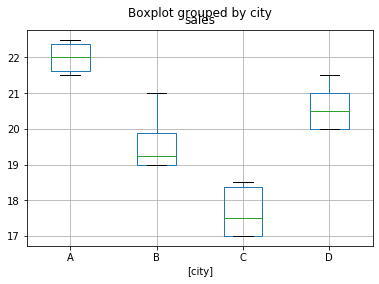

In [43]:
#Boxplots of Sales vs City
salescity.boxplot(by = 'city')

In [44]:
#Tukey HSD

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [57]:
tukey = pairwise_tukeyhsd(salescity.sales, salescity.city, alpha = 0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -2.4167  0.001 -3.5157 -1.3176   True
     A      C  -4.3333  0.001 -5.4324 -3.2343   True
     A      D  -1.4167 0.0088 -2.5157 -0.3176   True
     B      C  -1.9167  0.001 -3.0157 -0.8176   True
     B      D      1.0 0.0828  -0.099   2.099  False
     C      D   2.9167  0.001  1.8176  4.0157   True
----------------------------------------------------


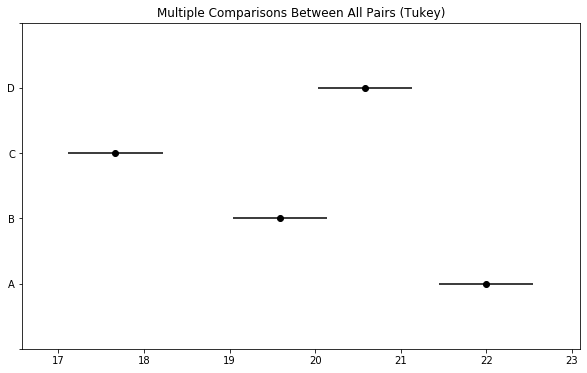

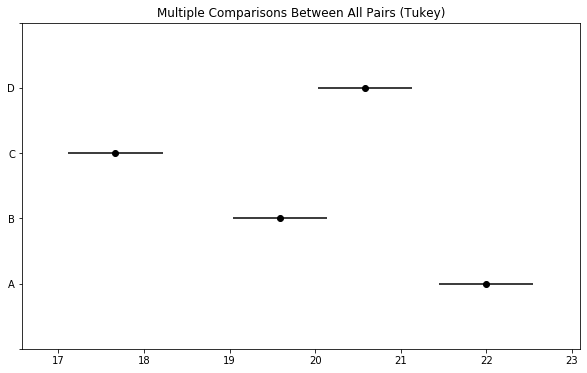

In [46]:
#Turkey plot
tukey.plot_simultaneous()

In [47]:
#Chi Square Test
#Ho: There is no significant association between
#Anxiety and Drug Reaction
pd.crosstab(cs2m.AnxtyLH, cs2m.DrugR, margins = True)

DrugR,0,1,All
AnxtyLH,,,
0,11,5,16
1,4,10,14
All,15,15,30


In [49]:
AnxtyDrug = np.array([[11,5],[4,10]])
scipy.stats.chi2_contingency(AnxtyDrug)

(3.3482142857142856, 0.06727796053834906, 1, array([[8., 8.],
        [7., 7.]]))

In [ ]:
#Chi Square Test
#Ho: There is no significant association between
#Anxiety and Drug Reaction
